[ 개발 주제 : 꽃잎 너비 예측 모델 ]
- 데이터셋 : iris.csv
 * 피쳐/특성/데이터 : sepal.length, sepal.width, petal.length (다변량)
 * 타겟/정답/레이블 : petal.width 
- 학습종류 : 지도학습 - 회귀
- 알고리즘 : 데이터셋 분석 후 결정 
- 검증 : 5개 교차검증 진행 

In [2]:
# [1-1] 모듈 로딩
from sklearn.linear_model import LinearRegression                                               # 머신러닝 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error     # 성능평가 모듈 
from sklearn.model_selection import train_test_split                                            # 데이터셋 분리 모듈
from sklearn.model_selection import KFold                                                       # 교차검증
import matplotlib.pyplot as plt 
import pandas as pd 

In [3]:
# [1-2] 데이터 준비

# iris 데이터
iris_df = pd.read_csv('iris.csv', usecols=[0,1,2,3])

display(iris_df)

sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

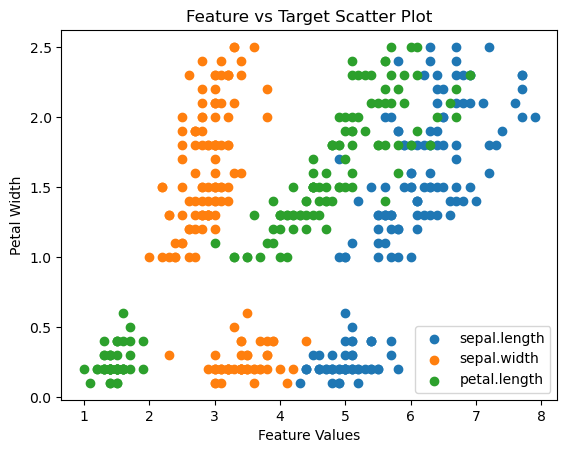

In [4]:
# [1-3] 탐색적 분석 - 시각화 

featureDF = iris_df[['sepal.length', 'sepal.width', 'petal.length']] # 2차원
targetSR = iris_df['petal.width']     # 1차원 

for column in featureDF.columns:
    plt.scatter(featureDF[column], targetSR, label=column)
    
plt.xlabel('Feature Values')
plt.ylabel('Petal Width')
plt.legend()
plt.title('Feature vs Target Scatter Plot')
plt.show()

In [5]:
# [1-4] 탐색적 분석 - 상관계수
iris_df.corr()['petal.width']

sepal.length    0.817941
sepal.width    -0.366126
petal.length    0.962865
petal.width     1.000000
Name: petal.width, dtype: float64

In [6]:
# [1-5] 탐색적 분석 결과 
# 알고리즘 : 선형 회귀 => 규제선형모델 Ridge, Lasso, Elastic

In [7]:
# [2-1] 데이터셋 준비 => 학습용, 검증용, 테스트용 
# 학습용 : 규칙과 패턴 찾기 위해 사용되는 데이터셋
# 검증용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
# 테스트용 : 학습 완료 후 검사용 데이터셋

# 전체 데이터셋에서 학습용 / 테스트용 분리 (70:30 or 80:20)
featureDF = iris_df[iris_df.columns[:-1]] # 2차원
targetSR = iris_df['petal.width']     # 1차원 

In [8]:
# 학습용 : 테스트용 = 70:30 
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=10)

In [15]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 교차검증 객체 생성 
kf = KFold()   # 5개 분할 : 기본값

In [28]:
# 데이터말고 인덱스를 반환 
# 교차검증으로 학습 및 검증 진행
# Train - Test 나누고 train을 K개로 분리 

result_df = pd.DataFrame(columns=['alpha', 'score', 'rmse'])

# alpha 값에 따른 Ridge 모델 성능 비교
for alpha in [0.1, 0.5, 1.0 , 1.5, 2]:
    # 선형회귀 모델 객체 생성  
    lr = Ridge(alpha=alpha)
    
    total1, total2 = 0, 0
    total3, total4 = 0, 0

    for i, (train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")

        # 학습용 / 테스트용 피쳐와 타겟 추출
        train_data, train_label = x_train.iloc[train_index], y_train.iloc[train_index]
        test_data, test_label = x_train.iloc[test_index], y_train.iloc[test_index]
            
        # 학습
        lr.fit(train_data, train_label)

        # 성능평가 
        train_score = lr.score(train_data, train_label)
        test_score = lr.score(test_data, test_label)
        
        # 오차계산
        train_rmse = root_mean_squared_error(train_label, lr.predict(train_data))
        test_rmse = root_mean_squared_error(test_label, lr.predict(test_data))
        
        total1 += train_score 
        total2 += test_score 
        total3 += train_rmse 
        total4 += test_rmse 
    
    result_df.loc[f'train{len(result_df)}'] = [alpha, total1 / 5, total3 / 5]
    result_df.loc[f'test{len(result_df)}'] = [alpha, total2 / 5, total4 / 5]
    

Fold 0:
  Train: index=[ 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104]
  Test:  index=[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Fold 2:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  

In [29]:
display(result_df)

alpha     score      rmse
train0    0.1  0.945211  0.179536
test1     0.1  0.938180  0.186939
train2    0.5  0.944999  0.179883
test3     0.5  0.938298  0.186701
train4    1.0  0.944474  0.180742
test5     1.0  0.938115  0.186939
train6    1.5  0.943784  0.181862
test7     1.5  0.937711  0.187537
train8    2.0  0.943012  0.183108
test9     2.0  0.937183  0.188341

In [12]:
# 검증 이후 테스트 수행
# - 테스트 데이터셋 사용

In [13]:
# 테스트 데이터에 대한 예측값 추출
pre_y = lr.predict(x_test)

# 평가
score = lr.score(x_test, y_test)
rmse = root_mean_squared_error(y_test, pre_y)

print(score, rmse)

0.9216380964882229 0.20666057151084496


In [1]:
# 모델 활용 / 서비스
# 사용자로부터 입력받기

print('[ 품종 조회 ]')
new_data = input('입력 : ').split(',')

new_data = [float(data) for data in new_data]
print(new_data)

# 예측결과 출력
data_df =  pd.DataFrame([new_data], columns=['sepal.length','petal.length'])  # 예측결과 데이터 형태는 동일해야한다. 
lr.predict(data_df)


[ 품종 조회 ]
[3.0, 4.0]


NameError: name 'pd' is not defined